<a href="https://colab.research.google.com/github/deep-l3arn3r/tutorials/blob/main/torch_tut_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt

from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


***Q1 Create Dataset***

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [67]:
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

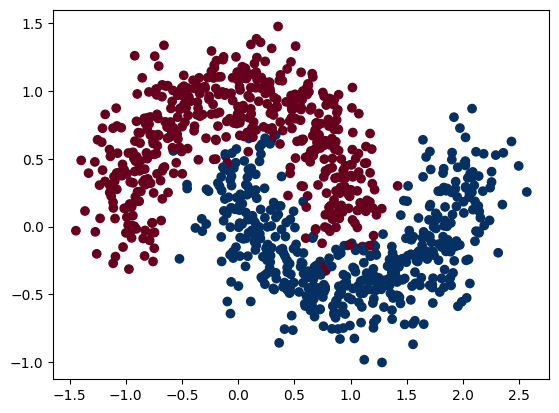

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(750, 2)

In [70]:
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [71]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return round(acc, 2)

In [72]:
class MoonsClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_1 = nn.Linear(2, 5)
    self.relu_1 = nn.ReLU()
    self.linear_2 = nn.Linear(5, 10)
    self.relu_2 = nn.ReLU()
    self.linear_3 = nn.Linear(10, 20)
    self.relu_3 = nn.ReLU()
    self.linear_4 = nn.Linear(20, 1)


  def forward(self, X):
    X = self.relu_1(self.linear_1(X))
    X = self.relu_2(self.linear_2(X))
    X = self.relu_3(self.linear_3(X))
    X = self.linear_4(X)
    return X

In [73]:
model = MoonsClassifier()
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

best_loss = 1e8

for epoch in range(1000):

  model.train()

  y_train_logits = model(X_train).squeeze(dim=1)
  y_proba_train = torch.sigmoid(y_train_logits)

  train_loss = loss_fn(y_train_logits, y_train)

  y_pred_train = torch.round(y_proba_train)

  train_accuracy = accuracy_fn(y_pred_train, y_train)

  optim.zero_grad()

  train_loss.backward()

  optim.step()

  model.eval()
  with torch.inference_mode():
    y_test_logits = model(X_test).squeeze(dim=1)
    y_proba_test = torch.sigmoid(y_test_logits)
    test_loss = loss_fn(y_test_logits, y_test)

    y_pred_test = torch.round(y_proba_test)
    test_accuracy = accuracy_fn(y_pred_test, y_test)

    if test_loss < best_loss:
      best_loss = test_loss
      best_model = model.state_dict()
      best_accuracy = test_accuracy

  if epoch % 50 == 0:
    print(epoch, round(train_loss.item(), 3), train_accuracy,  round(test_loss.item(), 3) , test_accuracy)

0 0.702 50.53 0.703 48.4
50 0.688 64.93 0.689 60.4
100 0.661 72.93 0.662 70.8
150 0.519 79.47 0.509 81.2
200 0.366 84.8 0.34 86.0
250 0.315 86.27 0.28 87.6
300 0.301 87.07 0.261 88.8
350 0.292 87.47 0.251 89.2
400 0.282 87.73 0.241 90.0
450 0.27 88.0 0.229 90.4
500 0.254 88.67 0.214 91.2
550 0.233 89.87 0.194 92.0
600 0.206 91.33 0.17 93.2
650 0.173 93.2 0.14 95.2
700 0.142 94.67 0.112 96.4
750 0.121 95.47 0.094 96.8
800 0.107 96.27 0.081 97.6
850 0.098 96.67 0.073 97.6
900 0.091 96.67 0.068 97.2
950 0.09 96.67 0.064 98.4


In [74]:
best_accuracy

98.0

In [75]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


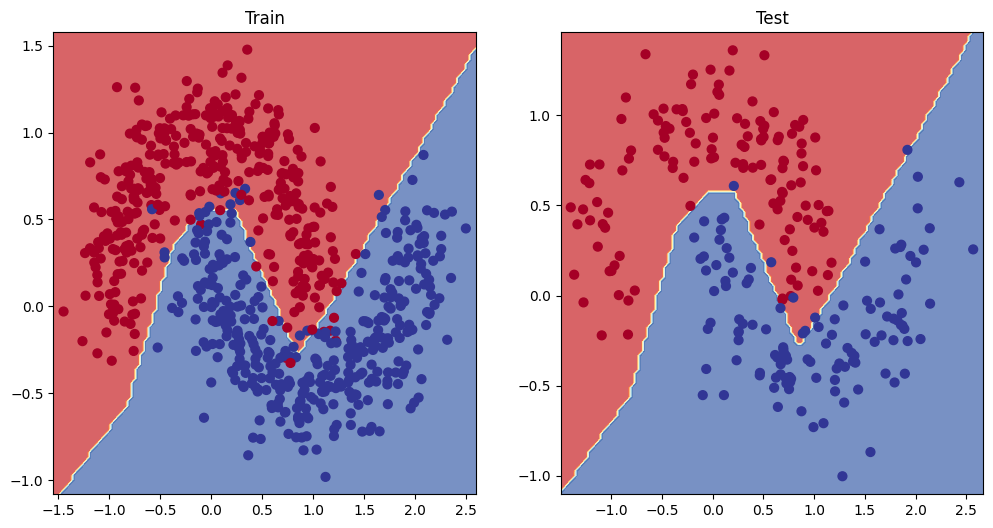

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) # model_3 = has non-linearity

***Q7 spiral***

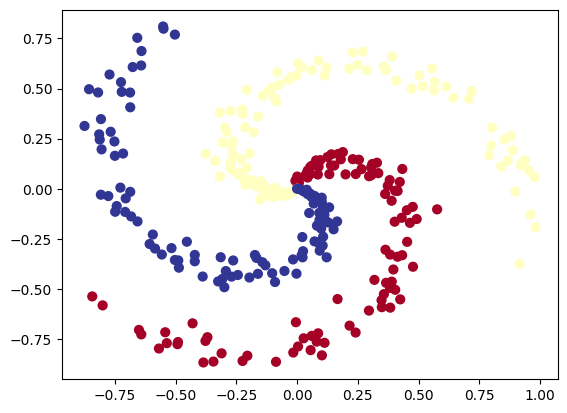

In [104]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(225, 2)

In [139]:
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [146]:
class StansClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_1 = nn.Linear(2, 5)
    self.relu_1 = nn.ReLU()
    self.linear_2 = nn.Linear(5, 10)
    self.relu_2 = nn.ReLU()
    self.linear_3 = nn.Linear(10, 20)
    self.relu_3 = nn.ReLU()
    self.linear_4 = nn.Linear(20, 3)


  def forward(self, X):
    X = self.relu_1(self.linear_1(X))
    X = self.relu_2(self.linear_2(X))
    X = self.relu_3(self.linear_3(X))
    X = self.linear_4(X)
    return X.type(torch.float)

In [147]:
model_2 = StansClassifier()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model_2.parameters(), lr=0.1)

best_loss = 1e8

for epoch in range(1500):

  model_2.train()

  y_train_logits = model_2(X_train).type(torch.float)
  y_proba_train = torch.softmax(y_train_logits, dim=1).type(torch.float)

  train_loss = loss_fn(y_train_logits.squeeze(dim=1), y_train.type(torch.long))

  y_pred_train = torch.argmax(y_proba_train, dim=1).type(torch.float)

  train_accuracy = accuracy_fn(y_pred_train, y_train)

  optim.zero_grad()

  train_loss.backward()

  optim.step()

  model_2.eval()
  with torch.inference_mode():
    y_test_logits = model_2(X_test)
    y_proba_test = torch.softmax(y_test_logits, dim=1)
    test_loss = loss_fn(y_test_logits.squeeze(dim=1), y_test.type(torch.long))

    y_pred_test = torch.argmax(y_proba_test, dim=1).type(torch.float)
    test_accuracy = accuracy_fn(y_pred_test, y_test)

    if test_loss < best_loss:
      best_loss = test_loss
      best_model = model_2.state_dict()
      best_accuracy = test_accuracy

  if epoch % 50 == 0:
    print(epoch, round(train_loss.item(), 3), train_accuracy,  round(test_loss.item(), 3) , test_accuracy)

0 1.106 33.33 1.103 33.33
50 1.097 36.0 1.098 41.33
100 1.093 47.11 1.094 38.67
150 1.085 55.11 1.087 50.67
200 1.068 56.0 1.07 56.0
250 1.017 59.56 1.019 61.33
300 0.9 59.56 0.901 60.0
350 0.774 62.22 0.781 57.33
400 0.671 67.11 0.696 65.33
450 0.6 66.22 0.643 66.67
500 0.54 69.33 0.583 69.33
550 0.482 72.0 0.524 66.67
600 0.427 76.89 0.465 68.0
650 0.375 82.22 0.405 77.33
700 0.323 88.44 0.345 92.0
750 0.287 92.0 0.304 94.67
800 0.25 92.0 0.26 97.33
850 0.218 93.78 0.221 98.67
900 0.189 93.78 0.183 98.67
950 0.162 94.22 0.15 98.67
1000 0.146 94.67 0.13 98.67
1050 0.135 95.11 0.116 98.67
1100 0.123 96.0 0.103 98.67
1150 0.116 96.0 0.096 98.67
1200 0.112 96.0 0.092 98.67
1250 0.107 96.0 0.088 97.33
1300 0.102 96.0 0.082 97.33
1350 0.097 96.0 0.077 97.33
1400 0.094 96.0 0.074 97.33
1450 0.092 96.0 0.071 97.33


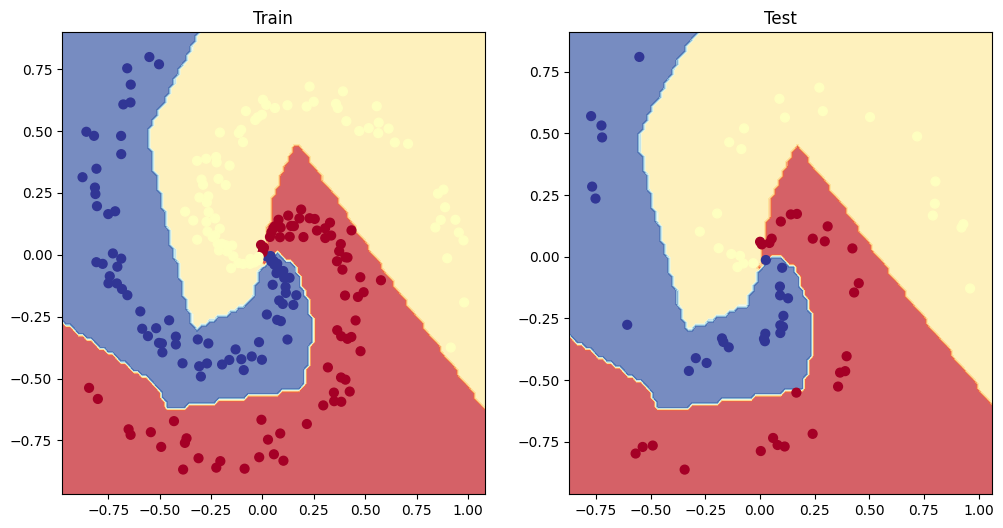

In [148]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity